In [1]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from rasterio.plot import show
import pyproj
%matplotlib inline
import os
import cv2 as cv

In [2]:
im_aux = rasterio.open('dop40_clip.TIF')

In [3]:
im_aux

<open DatasetReader name='dop40_clip.TIF' mode='r'>

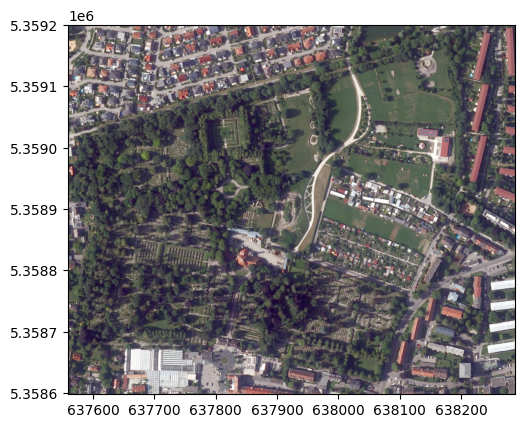

<Axes: >

In [4]:
plot.show(im_aux)

In [5]:
im_aux.dtypes

('uint8', 'uint8', 'uint8')

In [6]:
im_aux.crs

CRS.from_epsg(25832)

In [7]:
im_aux.transform

Affine(0.40000000000002556, 0.0, 637559.6,
       0.0, -0.4000000000002474, 5359200.4)

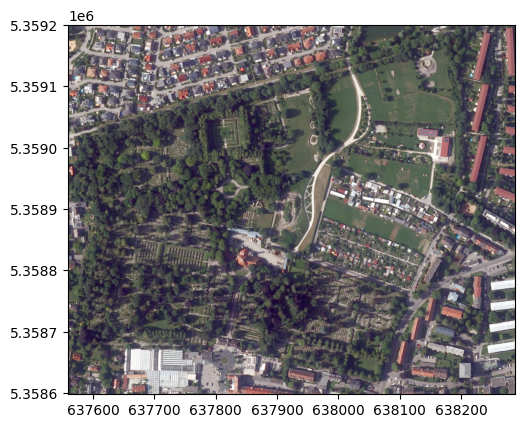

<Axes: >

In [8]:
plot.show(im_aux)

In [9]:
# Color [blue green red]
water_bgr = np.array([223, 211, 171])
upper = np.array([233, 221, 181])
lower = np.array([213, 201, 161])
motorway_bgr = np.array([139, 112, 229])
federal_bgr = np.array([146, 204, 243])
forest_bgr = np.array([177, 218, 189])
settlement_bgr = np.array([217,217,217])
BGR = settlement_bgr
upper = BGR + 10
lower = BGR - 1

In [13]:
BGR = np.array([0, 120, 0])
upper = BGR + 75
lower = BGR - 75

In [14]:
image = im_aux

def read_image(path):
    return cv.imread(path)

def find_mask(image):
    return cv.inRange(image, lower, upper)

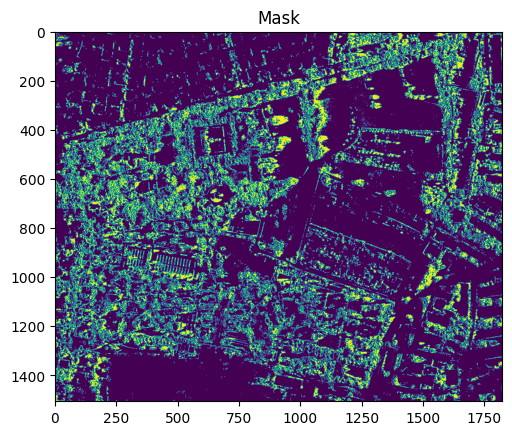

In [15]:
image = read_image('dop40_clip.TIF')
mask = find_mask(image)
plt.imshow(mask)
plt.title('Mask')
plt.show() 

In [16]:
def find_contours(mask):
    cnts, hierarchy = cv.findContours(
            mask.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    print("Found %d shapes" % (len(cnts)))
    return cnts

In [17]:
def show_contours(contours, image):
    cv.drawContours(image, contours, -1, (0, 255, 0), 2)
    plt.imshow(image)
    plt.title('Contours')
    plt.show()

Found 13471 shapes


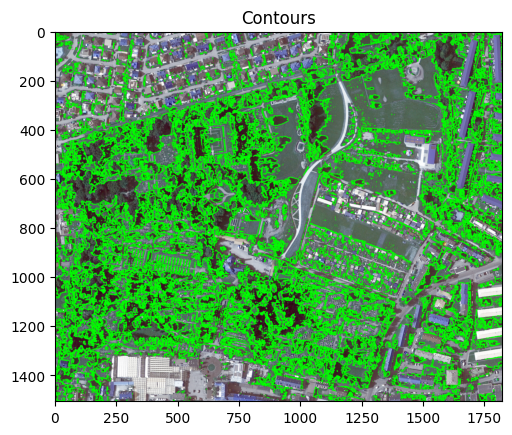

In [18]:
contours = find_contours(mask)
show_contours(contours, image)